Exploratory use of the official NHL API

In [20]:
# Importing libraries
import json
import requests
from functools import reduce
from operator import add
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

After importing the necessary libraries, it's time to define lists to be able to group teams by conference and division. And as we know in the NHL, there are 32 teams total within 2 conferences with 4 divisions between them. Don't forget that the Arizona Coyotes have become the Utah Hockey Club!

In [21]:
# Creating list for team abbreviations, conferences, and divisions
TEAM_ABRS = ["BOS", "BUF", "DET", "FLA", "MTL", "OTT", "TBL", "TOR", "CAR", "CBJ", "NJD", "NYI", "NYR", "PHI", "PIT", "WSH", "UTA", "CHI", "COL", "DAL", "MIN", "NSH", "STL", "WPG", "ANA", "CGY", "EDM", "LAK", "SJS", "SEA", "VAN", "VGK"]
EASTERN = TEAM_ABRS[:16]
WESTERN = TEAM_ABRS[16:]
ATLANTIC = TEAM_ABRS[:8]
METROPOLITAN = TEAM_ABRS[8:16]
CENTRAL = TEAM_ABRS[16:24]
PACIFIC = TEAM_ABRS[24:]

Using team abbreviations to create a more comprehensive list containing each team's location, name, primary color, and secondary color.

In [22]:
# Team Abbreviation: (Location, Team Name, Primary Color, Secondary Color)
TEAM_INFO = {"BOS": ("Boston", "Bruins", "#FFB81C", "#000000"),
             "BUF": ("Buffalo", "Sabres", "#003087", "#FFB81C"),
             "DET": ("Detroit", "Red Wings", "#CE1126", "#FFFFFF"),
             "FLA": ("Florida", "Panthers", "#041E42", "#B9975B"),
             "MTL": ("Montreal", "Canadiens", "#AF1E2D", "#192168"),
             "OTT": ("Ottawa", "Senators", "#DA1A32", "#B79257"),
             "TBL": ("Tampa Bay", "Lightning", "#002868", "#FFFFFF"),
             "TOR": ("Toronto", "Maple Leafs", "#00205B", "#FFFFFF"),
             "CAR": ("Carolina", "Hurricanes", "#CE1126", "#000000"),
             "CBJ": ("Columbus", "Blue Jackets", "#002654", "#CE1126"),
             "NJD": ("New Jersey", "Devils", "#CE1126", "#000000"),
             "NYI": ("New York", "Islanders", "#00539B", "#F47D30"),
             "NYR": ("New York", "Rangers", "#0038A8", "#CE1126"),
             "PHI": ("Philadelphia", "Flyers", "#F74902", "#000000"),
             "PIT": ("Pittsburgh", "Penguins", "#FCB514", "#000000"),
             "WSH": ("Washington", "Capitals", "#041E42", "#C8102E"),
             "UTA": ("Utah", "Hockey Club", "#8C2633", "#E2D6B5"),
             "CHI": ("Chicago", "Blackhawks", "#CF0A2C", "#FF671B"),
             "COL": ("Colorado", "Avalanche", "#6F263D", "#236192"),
             "DAL": ("Dallas", "Stars", "#006847", "#8F8F8C"),
             "MIN": ("Minnesota", "Wild", "#A6192E", "#154734"),
             "NSH": ("Nashville", "Predators", "#FFB81C", "#041E42"),
             "STL": ("St. Louis", "Blues", "#002F87", "#FCB514"),
             "WPG": ("Winnipeg", "Jets", "#041E42", "#AC162C"),
             "ANA": ("Anaheim", "Ducks", "#B9975B", "#F47A38"),
             "CGY": ("Calgary", "Flames", "#D2001C", "#FAAF19"),
             "EDM": ("Edmonton", "Oilers", "#041E42", "#FF4C00"),
             "LAK": ("Los Angeles", "Kings", "#111111", "#A2AAAD"),
             "SJS": ("San Jose", "Sharks", "#006D75", "#EA7200"),
             "SEA": ("Seattle", "Kraken", "#001628", "#99D9D9"),
             "VAN": ("Vancouver", "Canucks", "#00205B", "#041C2C"),
             "VGK": ("Vegas", "Golden Knights", "#B4975A", "#333F42")}

Lastly, we need to define two important functions that will allow us to retrieve and view the data from the API. The data we'll need to gather is stored in the json file format.

In [23]:
# Function to get json file from the API
def get_json(url):
  try:
    response = requests.get(url, params={"Content-Type": "application/json"})
    response.raise_for_status()
  except requests.exceptions.HTTPError as errh:
    print ("Http Error:",errh)
    return
  except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)
    return
  except requests.exceptions.Timeout as errt:
    print ("Timeout Error:",errt)
    return
  except requests.exceptions.RequestException as err:
    print ("Oops: Something Else",err)
    return
  data = response.json()
  return data

# Function to print json file data in a readable format
def print_json(data):
  print(json.dumps(data, indent=2))

Now that that's out of the way, let's see what we can find first from exploring the NHL API.

In [24]:
# Query endpoint for retrieving the stats for every goalie that has played so far in the current 2024-2025 NHL season.
print_json(get_json("https://api.nhle.com/stats/rest/en/goalie/summary?cayenneExp=seasonId=20242025"))

{
  "data": [
    {
      "assists": 0,
      "gamesPlayed": 2,
      "gamesStarted": 2,
      "goalieFullName": "Arvid Soderblom",
      "goals": 0,
      "goalsAgainst": 5,
      "goalsAgainstAverage": 2.52348,
      "lastName": "Soderblom",
      "losses": 1,
      "otLosses": 1,
      "penaltyMinutes": 0,
      "playerId": 8482821,
      "points": 0,
      "savePct": 0.91071,
      "saves": 51,
      "seasonId": 20242025,
      "shootsCatches": "L",
      "shotsAgainst": 56,
      "shutouts": 0,
      "teamAbbrevs": "CHI",
      "ties": null,
      "timeOnIce": 7133,
      "wins": 0
    },
    {
      "assists": 0,
      "gamesPlayed": 3,
      "gamesStarted": 3,
      "goalieFullName": "Joey Daccord",
      "goals": 0,
      "goalsAgainst": 8,
      "goalsAgainstAverage": 2.59646,
      "lastName": "Daccord",
      "losses": 0,
      "otLosses": 0,
      "penaltyMinutes": 0,
      "playerId": 8478916,
      "points": 0,
      "savePct": 0.91397,
      "saves": 85,
      "seasonId"

As you can see, there's a lot of potential in the data given to us by the NHL. Now, to allow further analysis of specific players and games, let's collect their respective ids.

In [25]:
# Get Game IDs of already played games for the entire 2024-2025 regular season for all teams
game_ids = []
for team in TEAM_ABRS:
  # Query endpoint loop that allows us to retrieve for each team easily
  data = get_json("https://api-web.nhle.com/v1/club-schedule-season/" + team +"/20242025")
  filtered_games = list(filter(lambda item: item["gameType"] == 2 and item['gameState'] == 'OFF', data["games"]))
  for game in filtered_games:
    id = game['id']
    if id not in game_ids:
      game_ids.append(id)
print(len(game_ids))

99


In [26]:
# Get Player IDs for all players currently active in the NHL
forwards_ids = []
defensemen_ids = []
goalies_ids = []
for team in TEAM_ABRS:
  data = get_json("https://api-web.nhle.com/v1/roster/" + team +"/20242025")
  forwards_data = list(data["forwards"])
  defensemen_data = list(data["defensemen"])
  goalies_data = list(data["goalies"])
  for forwards in forwards_data:
    id = forwards['id']
    if id not in forwards_ids:
      forwards_ids.append(id)
  for defensemen in defensemen_data:
    id = defensemen['id']
    if id not in defensemen_ids:
      defensemen_ids.append(id)
  for goalies in goalies_data:
    id = goalies['id']
    if id not in goalies_ids:
      goalies_ids.append(id)
player_ids = forwards_ids + defensemen_ids + goalies_ids

Time to have some fun exploring some of the data. My favorite team in the NHL is the Boston Bruins, which as of writing this, is painful. Let's take a look at how their 2024-2025 season has gone thus far.

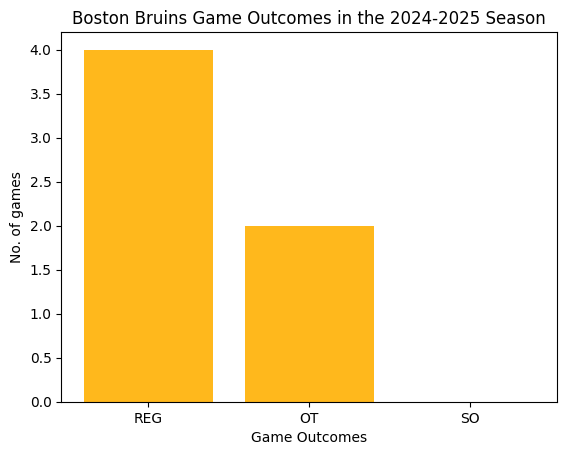

In [27]:
# Filter to find 2024-2025 regular season games already played by the Boston Bruins
data = get_json("https://api-web.nhle.com/v1/club-schedule-season/bos/20242025")
filtered_games = list(filter(lambda item: item["gameType"] == 2 and item["gameState"] == "OFF", data["games"]))
# Create a dictionary of game outcomes, key = game outcome, value = count
game_outcomes = {'REG':0, 'OT':0, 'SO':0}
for game in filtered_games:
  outcome =  game['gameOutcome']['lastPeriodType']
  game_outcomes.update({outcome: (game_outcomes.get(outcome) + 1)})

# Plot
plt.bar(list(game_outcomes.keys()), list(game_outcomes.values()), color ='#FFB81C', width = 0.8)
plt.xlabel("Game Outcomes")
plt.ylabel("No. of games")
plt.title("Boston Bruins Game Outcomes in the 2024-2025 Season")
plt.show()

What if we wanted to see the actual outcomes for these games? How many have they won? How many have they lost? P.s. not as many wins as I'd like.

In [29]:
# Collecting the ids for all Boston Bruins goalies
bruins_goalies_ids = []
for team in TEAM_ABRS:
  data = get_json("https://api-web.nhle.com/v1/roster/bos/20242025")
  bruins_goalies_data = list(data["goalies"])
  for goalies in bruins_goalies_data:
    id = goalies['id']
    if id not in bruins_goalies_ids:
      bruins_goalies_ids.append(id)

bruins_goalies_ids

[8476914, 8480280]

By collecting the ids for Boston Bruins goalies, I can easily determine which team has won each game against the Bruins.

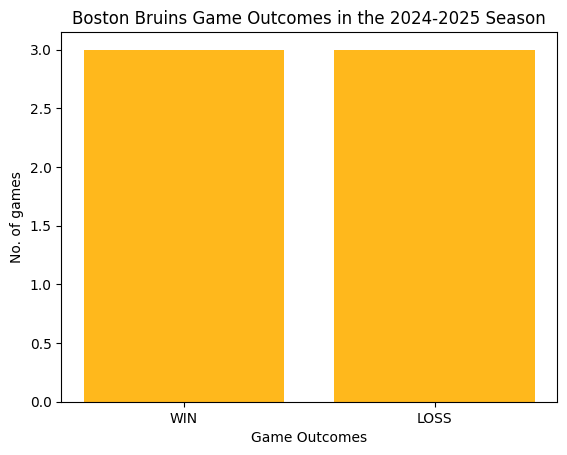

In [31]:
# Filter to find 2024-2025 regular season games already played by the Boston Bruins
data = get_json("https://api-web.nhle.com/v1/club-schedule-season/bos/20242025")
filtered_games = list(filter(lambda item: item["gameType"] == 2 and item["gameState"] == "OFF", data["games"]))

# Create a dictionary of game outcomes, key = game outcome, value = count
game_outcomes = {'WIN':0, 'LOSS':0}
for game in filtered_games:
  winning_goalie =  game['winningGoalie']['playerId']

  if winning_goalie in bruins_goalies_ids:
    game_outcomes.update({'WIN': game_outcomes['WIN'] + 1})
  else:
    game_outcomes.update({'LOSS': game_outcomes['LOSS'] + 1})

# Plot
plt.bar(list(game_outcomes.keys()), list(game_outcomes.values()), color ='#FFB81C', width = 0.8)
plt.xlabel("Game Outcomes")
plt.ylabel("No. of games")
plt.title("Boston Bruins Game Outcomes in the 2024-2025 Season")
plt.show()

As you can see, the Bruins are on pace to win exactly half of their games and to lose exactly half of their games... not super impressive.